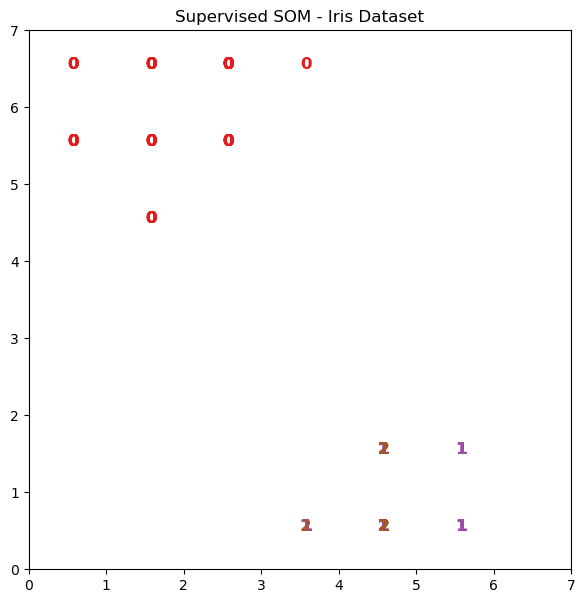

In [1]:
# install MiniSom (run in terminal or notebook)
# pip install minisom

from minisom import MiniSom
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target  # labels (0, 1, 2)

# Normalize data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Initialize SOM
som = MiniSom(x=7, y=7, input_len=4, sigma=1.0, learning_rate=0.5, random_seed=42)

# Train SOM
som.train_random(X_scaled, 100)

# Assign each neuron a label (majority class of its samples)
winner_labels = np.zeros((7, 7), dtype=int)
for i in range(7):
    for j in range(7):
        winner_labels[i, j] = -1  # uninitialized

for idx, x in enumerate(X_scaled):
    i, j = som.winner(x)
    if winner_labels[i, j] == -1:
        winner_labels[i, j] = y[idx]
    else:
        # keep majority label (simple approach)
        if np.random.rand() > 0.5:
            winner_labels[i, j] = y[idx]

# Plot the SOM with class labels
plt.figure(figsize=(7, 7))
for i, x in enumerate(X_scaled):
    w = som.winner(x)
    plt.text(w[0] + 0.5, w[1] + 0.5, str(y[i]),
             color=plt.cm.Set1(y[i] / 3.0),
             fontdict={'weight': 'bold', 'size': 12})
plt.xlim([0, 7])
plt.ylim([0, 7])
plt.title("Supervised SOM - Iris Dataset")
plt.show()